# Weather Forecasting

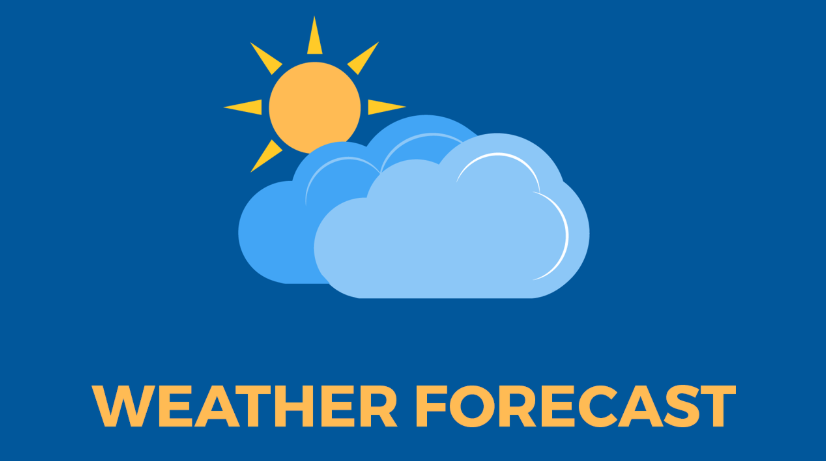

## Import Library

In [ ]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

## Importing Datasets

In [ ]:
link_data_training = '../data/raw/Train/Admiralty/Data_Gabungan_Lainnya_2009.csv'
contoh = pd.read_csv(link_data_training)
contoh.head()

In [ ]:
import os
import glob
import re

# Path
base_train_path = '../data/raw/Train'
output_path = '../data/merged/'

# Cleaning Column Name
def clean_column_names(df):
    """
    Membersihkan dan menyeragamkan nama kolom pada DataFrame.
    """
    new_columns = []
    for col in df.columns:
        cleaned_col = col.strip().replace(' ', '_').lower()
        cleaned_col = re.sub(r'[().%°]', '', cleaned_col)
        new_columns.append(cleaned_col)
    df.columns = new_columns
    return df

# Merge Dataset Each City
def proses_semua_lokasi(path_induk, path_keluaran):
    """
    Melakukan loop ke semua folder, menggabungkan CSV, membersihkan nama kolom,
    dan menyimpan hasilnya.
    """
    print("Memulai proses otomatis untuk semua lokasi...")
    os.makedirs(path_keluaran, exist_ok=True)
    print(f"Folder output dipastikan ada di: {path_keluaran}")

    try:
        folder_lokasi = [f.name for f in os.scandir(path_induk) if f.is_dir()]
        print(f"Ditemukan {len(folder_lokasi)} folder lokasi untuk diproses.")
    except FileNotFoundError:
        print(f"❌ Error: Direktori induk tidak ditemukan di '{path_induk}'. Hentikan proses.")
        return

    for nama_lokasi in folder_lokasi:
        print(f"\n-> Memproses: '{nama_lokasi}'...")

        path_lokasi_spesifik = os.path.join(path_induk, nama_lokasi)
        daftar_file_csv = sorted(glob.glob(os.path.join(path_lokasi_spesifik, "*.csv")))

        if not daftar_file_csv:
            print(f"  -- Lewati '{nama_lokasi}', tidak ada file .csv ditemukan.")
            continue

        # PENTING: Lakukan pembersihan nama kolom SEBELUM digabung
        list_of_dfs = []
        for file in daftar_file_csv:
            df = pd.read_csv(file)
            # Langsung bersihkan nama kolom setelah file dibaca
            df = clean_column_names(df)
            list_of_dfs.append(df)

        # Gabungkan DataFrame yang nama kolomnya sudah seragam
        df_gabungan = pd.concat(list_of_dfs, ignore_index=True)

        # Cek jumlah kolom setelah digabung
        print(f"  -> Jumlah kolom setelah digabung: {len(df_gabungan.columns)}")

        nama_file_output = f"{nama_lokasi}_merged.csv"
        path_file_output = os.path.join(path_keluaran, nama_file_output)

        df_gabungan.to_csv(path_file_output, index=False)
        print(f"  ✅ Berhasil! Data dengan kolom bersih disimpan di: '{nama_file_output}'")

    print("\n\n🎉 Semua proses selesai!")

# Running
proses_semua_lokasi(base_train_path, output_path)

In [ ]:
admiralty_merged_path = '../data/merged/Admiralty_merged.csv'
admiralty_merged = pd.read_csv(admiralty_merged_path)
admiralty_merged.head()

In [ ]:
admiralty_merged.info()

## Import Data Eksternal

In [ ]:
train_clean.info()

## Data Test

## Modelling